In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ails_miccai_uwf4dr_challenge.datasetPreparation import DatasetBuilder

### Get some structure into the data

In [4]:
data = DatasetBuilder(dataset="original").get_unsplit_dataframe()
print(f'Total number of images: {len(data)}')
print(f'Number of images with quality labels: {len(data.dropna(subset=["quality"]))}')
print(f'Number of images with DR labels: {len(data.dropna(subset=["dr"]))}')
print(f'Number of images with DME labels: {len(data.dropna(subset=["dme"]))}')

Total number of images: 434
Number of images with quality labels: 434
Number of images with DR labels: 201
Number of images with DME labels: 167


### Let's plot some images by quality label

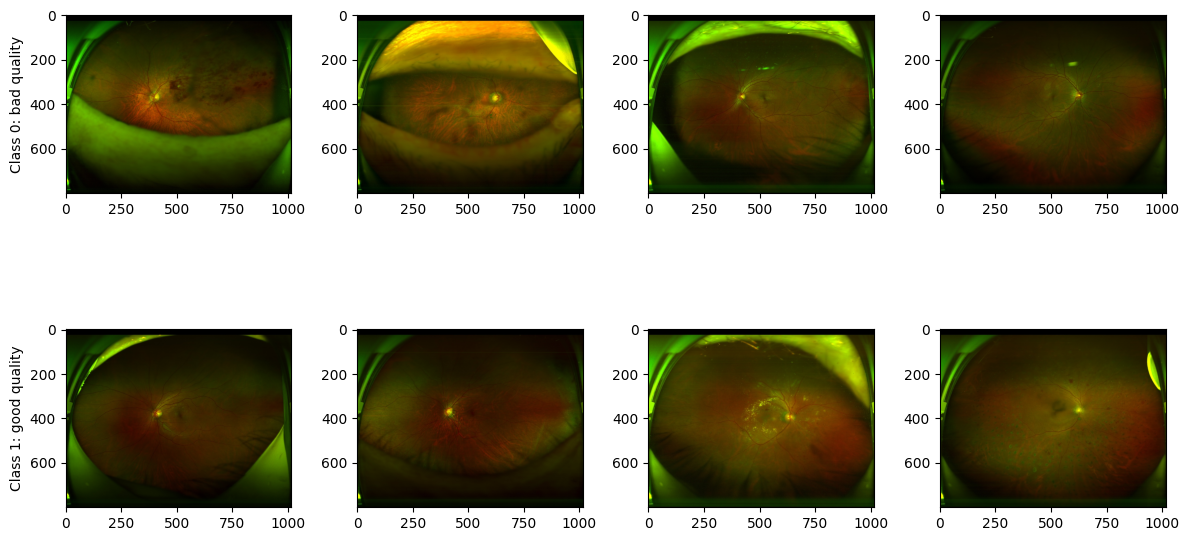

In [5]:
# plot some images of each class in subplot

n = 4

imgs_class_0 = data[data['quality'] == 0].sample(n)
imgs_class_1 = data[data['quality'] == 1].sample(n)

fig, axs = plt.subplots(2, n, figsize=(n*3, n+3))
for i, img in enumerate(imgs_class_0['image']):
    img = plt.imread(img)
    axs[0, i].imshow(img)
    # set y axis label for first image in row
    axs[0, 0].set_ylabel('Class 0: bad quality')
    
for i, img in enumerate(imgs_class_1['image']):
    img = plt.imread(img)
    axs[1, i].imshow(img)
    axs[1, 0].set_ylabel('Class 1: good quality')
    
plt.tight_layout()
plt.show()

# class 1 = good quality, class 0 = bad quality

#### Check out task-wise mean + std

In [6]:
def get_image_stats(image_path):
    image = plt.imread(image_path)
    return pd.Series([image.mean(), image.std()], index=['mean', 'std'])

image_stats = data['image'].apply(get_image_stats)

data[['means', 'stds']] = image_stats

In [7]:
print('Overall mean of all images:', data['means'].mean())
print('Overall std of all images:', data['stds'].mean())

Overall mean of all images: 37.894820349447244
Overall std of all images: 40.90581516069626


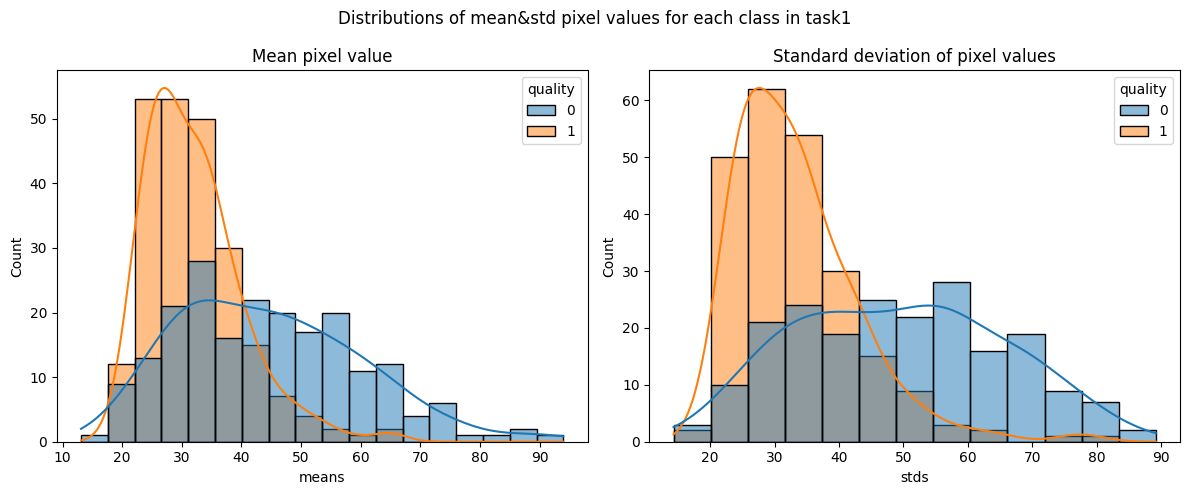

In [7]:
# plot the distribution of mean and std for each class
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data, x='means', hue='quality', kde=True, ax=axs[0])
sns.histplot(data, x='stds', hue='quality', kde=True, ax=axs[1])

# 1 = good quality, 0 = bad quality

axs[0].set_title('Mean pixel value')
axs[1].set_title('Standard deviation of pixel values')

fig.suptitle('Distributions of mean&std pixel values for each class in task1')

plt.tight_layout()
plt.show()

#### Get means and stds by channel

In [8]:
def get_image_stats(image_path):
    image = plt.imread(image_path)
    image = image / 255.0
    # get means and stds by channel
    means = image.mean(axis=(0, 1))
    stds = image.std(axis=(0, 1))
    return pd.Series(np.concatenate([means, stds]), index=['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b'])

# apply to images of quality = 1
image_stats = data[data['quality'] == 1]['image'].apply(get_image_stats)


In [9]:
image_stats.mean(axis=0)

mean_r    0.196011
mean_g    0.176979
mean_b    0.003224
std_r     0.117970
std_g     0.117698
std_b     0.005937
dtype: float64

## What have we learned?

* task 1 has more images than task 2+3

* task 1 has 205 images of "bad quality" and 28 images of "good quality"

* task 2+3 only have images of "good quality"

* the means and standard deviations of "bad quality" images are more spread out than those of "good quality" images